# 6. Support vector machine

First, we reimport libraries, arrays and list we are going to use for this section (from previous notebook)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_style('darkgrid')

In [2]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from IPython.display import display

In [3]:
class_labels = [0, 1, 2, 3, 4, 5]
class_names = ['bike', 'car', 'motorcycle', 'other', 'truck', 'van'] 
colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange']

with np.load('train_features.npz') as train_data:
    train_features = train_data['features']
    train_labels = train_data['labels']
    train_images = train_data['images']

X_train = np.array(train_features)
y_train = np.array(train_labels)
images_train = np.array(train_images)


with np.load('valid_features.npz') as valid_data:
    valid_features = valid_data['features']
    valid_labels = valid_data['labels']
    valid_images = valid_data['images']

X_valid = np.array(valid_features)
y_valid = np.array(valid_labels)
images_valid = np.array(valid_images)

with np.load('test_features.npz') as test_data:
    test_features = test_data['features']
    test_labels = test_data['labels']
    test_images = test_data['images']

X_test = np.array(test_features)
y_test = np.array(test_labels)
images_test = np.array(test_images)

We add validation images to train images as we are not using them in GridSearchCV

In [4]:
# Concatenate X_train and X_valid along the first axis
X_train = np.concatenate((X_train, X_valid), axis=0)
y_train = np.concatenate((y_train, y_valid), axis=0)
images_train = np.concatenate((images_train, images_valid), axis=0)

## RBF vs linear kernels, no tuning
Try with an SVM classifier. Does the RBF kernel perform better than the linear one ?

### Linear kernel

In [5]:
# Define the parameter grid to search over
param_grid = {
    'C': np.logspace(-1, 2, 20),
    'gamma': np.logspace(-4, 1, 20),
    'kernel': ['linear']
}

# SVM classifier with probability estimates enabled
svm_clf = SVC(probability=True)

# Use GridSearchCV to try different combinations of parameters
grid_search = GridSearchCV(
    svm_clf,
    param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

grid_search.fit(X_train, y_train)

print("Best parameters found by GridSearchCV:", grid_search.best_params_)

# Evaluation on test data
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Accuracy on unseen test data:: {:.2f}%".format(test_score * 100))

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Best parameters found by GridSearchCV: {'C': 0.1, 'gamma': 0.0001, 'kernel': 'linear'}
Accuracy on unseen test data:: 90.91%


Adding grid search results to a dataframe to get detailed view on results from cross-validation.

In [6]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.sort_values("mean_test_score", ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.196056,0.011936,0.010202,0.000400,0.1,0.0001,linear,"{'C': 0.1, 'gamma': 0.0001, 'kernel': 'linear'}",0.940476,0.964286,...,0.930952,0.023084,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
263,0.213447,0.006889,0.011217,0.002128,11.288379,0.000616,linear,"{'C': 11.288378916846883, 'gamma': 0.000615848...",0.940476,0.964286,...,0.930952,0.023084,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
273,0.212954,0.017332,0.011203,0.002857,11.288379,0.263665,linear,"{'C': 11.288378916846883, 'gamma': 0.263665089...",0.940476,0.964286,...,0.930952,0.023084,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
272,0.201850,0.005575,0.009200,0.000982,11.288379,0.143845,linear,"{'C': 11.288378916846883, 'gamma': 0.143844988...",0.940476,0.964286,...,0.930952,0.023084,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
271,0.212648,0.014641,0.010002,0.001550,11.288379,0.078476,linear,"{'C': 11.288378916846883, 'gamma': 0.078475997...",0.940476,0.964286,...,0.930952,0.023084,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0


### Radial basis function kernel

In [7]:
# Define the parameter grid to search over
param_grid = {
    'C': np.logspace(-1, 2, 20),
    'gamma': np.logspace(-4, 1, 20),
    'kernel': ['rbf']
}

# SVM classifier with probability estimates enabled
svm_clf = SVC(probability=True)

# Use GridSearchCV to try different combinations of parameters
grid_search = GridSearchCV(
    svm_clf,
    param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

grid_search.fit(X_train, y_train)

print("Best parameters found by GridSearchCV:", grid_search.best_params_)

# Evaluation on test data
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Accuracy on unseen test data:: {:.2f}%".format(test_score * 100))

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Best parameters found by GridSearchCV: {'C': 23.357214690901213, 'gamma': 0.00018329807108324357, 'kernel': 'rbf'}
Accuracy on unseen test data:: 90.91%


We see varying level of performance, but RBF always either perform similarly to linear or better. So we chose to continue with RBF kernel.

## Ten images at random
Pick ten images and compute the probability for each category using the predict_proba() function of the best SVM estimator you found in the previous question. Plot the results for each image and comment your findings. For example, you can plot the ten images in subplots and collect the probabilities in a DataFrame.

First we start by picking at random 10 images

In [8]:
# Randomly select ten test images
test_indices = np.random.choice(len(test_images), size=10, replace=False)
test_images_subset = test_images[test_indices]
test_features_subset = X_test[test_indices]
test_labels_subset = y_test[test_indices]

# Using best estimator we compute probabilities on subset
probas = grid_search.best_estimator_.predict_proba(test_features_subset)
# Insert probabilities into Dataframe
proba_df = pd.DataFrame(probas, columns=class_names)

# Adding True Label vs Predict Label
proba_df['True Label'] = test_labels_subset
proba_df['Predicted label'] = grid_search.predict(X_test[test_indices])
proba_df

,bike,car,motorcycle,other,truck,van,True Label,Predicted label
0,0.019381,0.008679,0.011438,0.925299,0.034403,0.000800,3.0,3.0
1,0.912334,0.006479,0.051335,0.023082,0.003332,0.003438,0.0,0.0
2,0.008740,0.053266,0.009604,0.187947,0.065360,0.675083,5.0,5.0
3,0.003249,0.784814,0.002598,0.005222,0.006538,0.197579,5.0,1.0
4,0.005033,0.011169,0.003891,0.083246,0.893998,0.002663,4.0,4.0
5,0.006146,0.008253,0.966738,0.008427,0.006387,0.004050,2.0,2.0
6,0.027612,0.003070,0.957677,0.005557,0.004094,0.001990,2.0,2.0
7,0.006600,0.013725,0.005175,0.097083,0.715891,0.161526,5.0,4.0
8,0.009718,0.020011,0.007455,0.010241,0.021679,0.930897,5.0,5.0
9,0.009213,0.022236,0.016995,0.750038,0.196823,0.004695,3.0,3.0


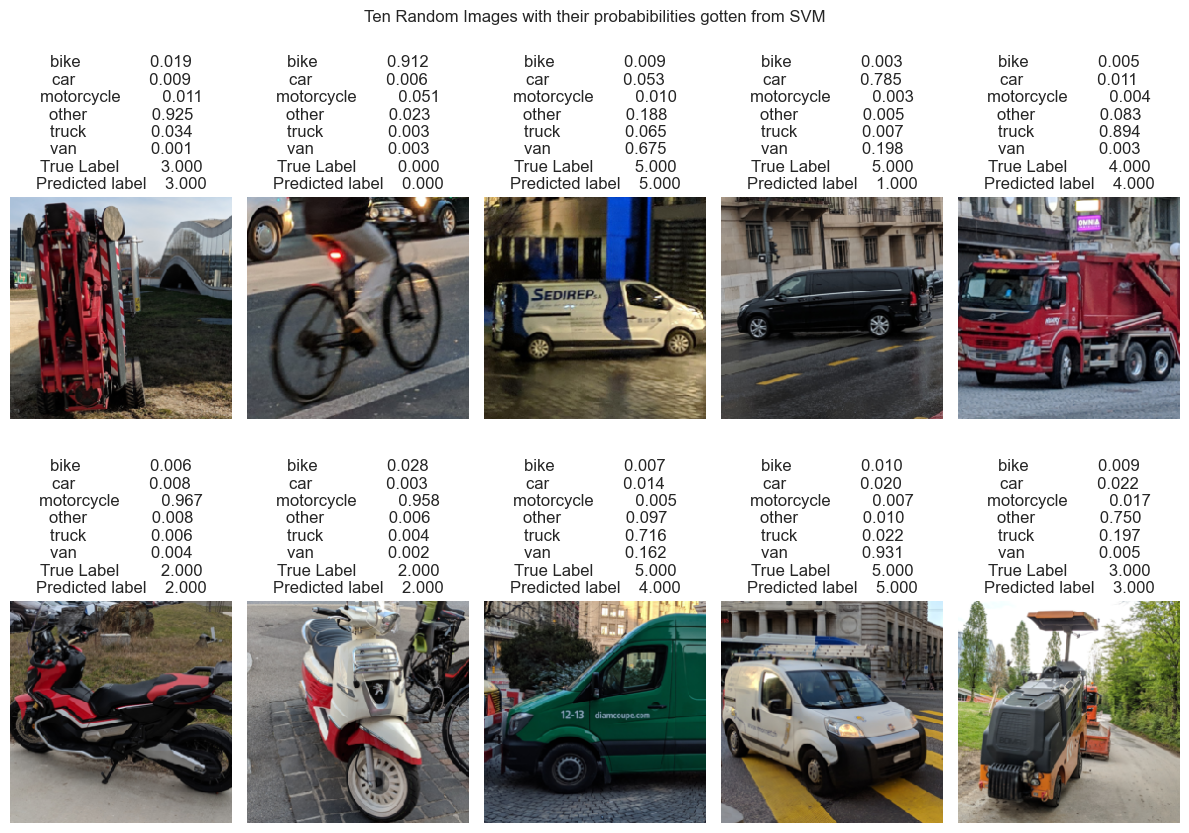

In [9]:
fig, axes = plt.subplots(2, 5, figsize=(12, 9))

for i, ax in enumerate(axes.flatten()):    
    ax.imshow(test_images_subset[i])
    ax.axis('off')      
    confidence_title = proba_df.iloc[i].map('{:,.3f}'.format).to_string()
    ax.set_title(confidence_title)
    
plt.tight_layout()
plt.suptitle("Ten Random Images with their probabibilities gotten from SVM", y=1.02)

plt.show()

## Tune $C$
Finally, vary the regularization strength of your SVM estimator (e.g. once using a C value of 0.0001 and once of 1000). What is the effect on the probabilities? Write your observations in a markdown cell.

We set kernel to rbf and gamma to grid_search.best_params_['gamma'] as this were best parameters out of previous gridsearch

In [10]:
# Define the parameter grid to search over
param_grid = {
    'C': np.logspace(-1, 2, 40)
}

# SVM classifierwith probability estimates enabled
svm_clf = SVC(
    kernel='rbf',
    gamma=grid_search.best_params_['gamma'],
    probability=True
)

# Use GridSearchCV to try different combinations of parameters
grid_search = GridSearchCV(
    svm_clf,
    param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

grid_search.fit(X_train, y_train)

print("Best parameters found by GridSearchCV:", grid_search.best_params_)

# Evaluation on test data
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Accuracy on unseen test data:: {:.2f}%".format(test_score * 100))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best parameters found by GridSearchCV: {'C': 10.0}
Accuracy on unseen test data:: 92.73%


In [11]:
cv_results = pd.DataFrame(grid_search.cv_results_)

cv_results["score_diff_test"] = cv_results["mean_test_score"] - cv_results["std_test_score"]

# Print a few interesting columns
columns = [
    "param_C",
    "mean_test_score",
    "std_test_score",
    "mean_train_score",
    "std_train_score",
    "score_diff_test"
]

cv_results[columns].sort_values("mean_test_score", ascending=False).head(15)

,param_C,mean_test_score,std_test_score,mean_train_score,std_train_score,score_diff_test
31,24.24462,0.933333,0.022080,0.995238,0.001458,0.911253
26,10.0,0.933333,0.026726,0.989286,0.001458,0.906607
30,20.309176,0.933333,0.019343,0.994643,0.002227,0.913990
32,28.942661,0.930952,0.020482,0.997024,0.002662,0.910471
27,11.937766,0.930952,0.023084,0.990476,0.002227,0.907868
28,14.251027,0.930952,0.023084,0.991071,0.003260,0.907868
29,17.012543,0.930952,0.023084,0.993452,0.002227,0.907868
39,100.0,0.930952,0.023084,1.000000,0.000000,0.907868
35,49.238826,0.930952,0.023084,1.000000,0.000000,0.907868
36,58.780161,0.930952,0.023084,1.000000,0.000000,0.907868


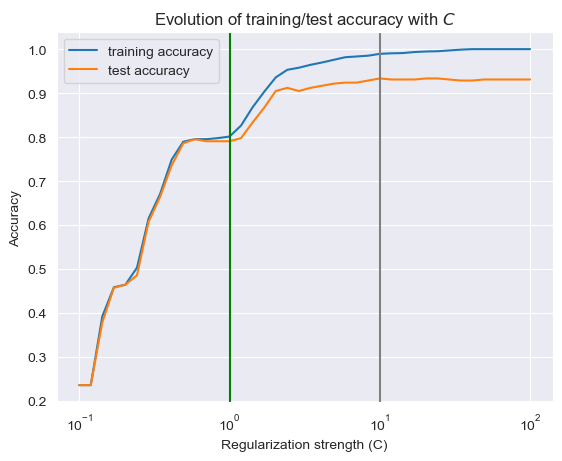

In [14]:
# Plot training/test accuracy curves
plt.semilogx(cv_results["param_C"], cv_results["mean_train_score"], label='training accuracy')
plt.semilogx(cv_results["param_C"], cv_results["mean_test_score"],  label='test accuracy')
plt.xlabel('Regularization strength (C)')
plt.axvline(1, c='g')
plt.axvline(grid_search.best_params_['C'], c='gray')
plt.ylabel('Accuracy')
plt.title("Evolution of training/test accuracy with $C$")
plt.legend()
plt.show()

SVM starts overfitting after C=1 and best parameters is found at C=10